In [1]:
import numpy as np
import scipy
from scipy.interpolate import UnivariateSpline, splrep
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt


def piecewise_func(x, X, Y):
    """
    cond_l: condition list
    func_l: function list
    """
    spl = UnivariateSpline(X, Y, k=3, s=0.5)
    tck = (spl._data[8], spl._data[9], 3)  # tck = (knots, coefficients, degree)
    p = scipy.interpolate.PPoly.from_spline(tck)

    cond_l = []
    func_l = []
    for idx, i in enumerate(range(3, len(spl.get_knots()) + 3 - 1)):
        cond_l.append([(x >= p.x[i] & x < p.x[i + 1])])
        func_l.append([lambda x: p.c[3, i] + p.c[2, i] * x + p.c[1, i] * x ** 2 + p.c[0, i] * x ** 3])

    return np.piecewise(x, cond_l, func_l)

In [6]:
def relu(x):
    return np.maximum(0, x)

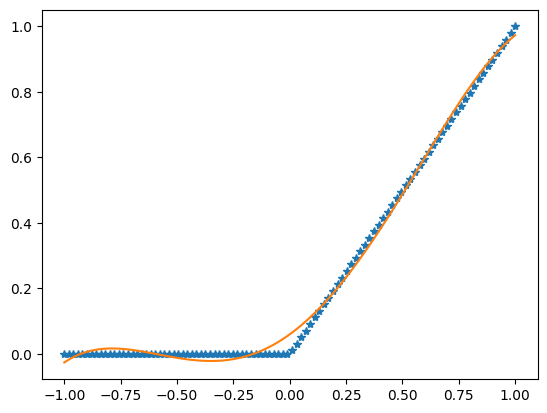

In [12]:
xdata = np.linspace(-1, 1, 100)
ydata = relu(xdata)

spl = UnivariateSpline(xdata, ydata, k=5, s=200)

plt.plot(xdata, ydata, '*')
plt.plot(xdata, spl(xdata))
plt.show()

#p, e = curve_fit(piecewise_func, xdata, ydata)
# x_plot = np.linspace(0., 0.15, len(x))
# plt.plot(x, y, "+")
# plt.plot(x, (piecewise_func(x_plot, *p)), 'C3-', lw=3)